In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '2018MayHousingSales.xlsx'

In [3]:
df = pd.read_excel(file)
dfSFBay = df.iloc[11:21]
dfSFBay.columns = dfSFBay.iloc[0]
dfSFBay

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [4]:
!pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


In [5]:
df = pd.read_excel(file)
dfSFBay = df.iloc[11:21]
dfSFBay.columns = dfSFBay.iloc[0]
dfSFBay

11,S.F. Bay Area,2018-05-01 00:00:00,2018-04-03 00:00:00,NaN,2017-05-01 00:00:00,NaN,Price MTM% Chg,Price YTY% Chg,2018-05-01 00:00:00,2018-04-03 00:00:00,2017-05-01 00:00:00,Sales MTM% Chg,Sales YTY% Chg
11,S.F. Bay Area,2018-05-01 00:00:00,2018-04-03 00:00:00,NaN,2017-05-01 00:00:00,NaN,Price MTM% Chg,Price YTY% Chg,2018-05-01 00:00:00,2018-04-03 00:00:00,2017-05-01 00:00:00,Sales MTM% Chg,Sales YTY% Chg
12,Alameda,1025000,969300,NaN,862000,NaN,0.0574641,0.189095,1013,877,949,0.155074,0.0674394
13,Contra Costa,687500,689660,NaN,653000,NaN,-0.00313198,0.0528331,1090,917,1037,0.188659,0.051109
14,Marin,1415000,1385000,NaN,1315000,NaN,0.0216606,0.0760456,239,207,231,0.154589,0.034632
15,Napa,702500,682500,NaN,673250,NaN,0.029304,0.043446,104,94,122,0.106383,-0.147541
16,San Francisco,1620000,1650000,NaN,1501680,NaN,-0.0181818,0.0787918,236,186,213,0.268817,0.107981
17,San Mateo,1600000,1770000,NaN,1480000,NaN,-0.0960452,0.0810811,452,345,441,0.310145,0.0249433
18,Santa Clara,1400000,1425000,NaN,1200000,NaN,-0.0175439,0.166667,1097,961,1116,0.141519,-0.0170251
19,Solano,451000,447500,NaN,415000,NaN,0.00782123,0.086747,427,371,430,0.150943,-0.00697674
20,Sonoma,698500,685000,NaN,625000,NaN,0.019708,0.1176,390,345,403,0.130435,-0.0322581


In [6]:
dfSFBay= dfSFBay.dropna(axis=1)
dfSFBay= dfSFBay.drop(dfSFBay.index[0])
dfSFBay.columns = 'SF Bay County','May-18','Apr-18','May-17','Price MTM % Chg','Price YTY % Chg','May-18(#)','Apr-18(#)','May-17(#)','Sales MTM % Chg','Sales YTY % Chg' 

In [7]:
dfSFBay[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']] = dfSFBay[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']].applymap("{0:.2f}".format)

In [8]:
dfSFBay

,SF Bay County,May-18,Apr-18,May-17,Price MTM % Chg,Price YTY % Chg,May-18(#),Apr-18(#),May-17(#),Sales MTM % Chg,Sales YTY % Chg
12,Alameda,1025000,969300,862000,0.06,0.19,1013,877,949,0.16,0.07
13,Contra Costa,687500,689660,653000,-0.00,0.05,1090,917,1037,0.19,0.05
14,Marin,1415000,1385000,1315000,0.02,0.08,239,207,231,0.15,0.03
15,Napa,702500,682500,673250,0.03,0.04,104,94,122,0.11,-0.15
16,San Francisco,1620000,1650000,1501680,-0.02,0.08,236,186,213,0.27,0.11
17,San Mateo,1600000,1770000,1480000,-0.10,0.08,452,345,441,0.31,0.02
18,Santa Clara,1400000,1425000,1200000,-0.02,0.17,1097,961,1116,0.14,-0.02
19,Solano,451000,447500,415000,0.01,0.09,427,371,430,0.15,-0.01
20,Sonoma,698500,685000,625000,0.02,0.12,390,345,403,0.13,-0.03


In [9]:
dfSFBay.index = np.arange(1, len(dfSFBay)+1)

In [10]:
dfSFBay['Price MTM % Chg'] = pd.to_numeric(dfSFBay['Price MTM % Chg'])
dfSFBay['Price YTY % Chg'] = pd.to_numeric(dfSFBay['Price YTY % Chg'])
dfSFBay['Sales MTM % Chg'] = pd.to_numeric(dfSFBay['Sales MTM % Chg'])
dfSFBay['Sales YTY % Chg'] = pd.to_numeric(dfSFBay['Sales YTY % Chg'])

dfSFBay.loc[:,'Price MTM % Chg'] = dfSFBay['Price MTM % Chg'] * 100
dfSFBay.loc[:,'Price YTY % Chg'] = dfSFBay['Price YTY % Chg'] * 100
dfSFBay.loc[:,'Sales MTM % Chg'] = dfSFBay['Sales MTM % Chg'] * 100
dfSFBay.loc[:,'Sales YTY % Chg'] = dfSFBay['Sales YTY % Chg'] * 100

In [11]:
mediansoldprice = dfSFBay.loc[:,:'Price YTY % Chg']

In [12]:
mediansoldsales = dfSFBay.loc[:,'May-18(#)':'Sales YTY % Chg']

In [13]:
sfheader = {'Median Sold Price($) of Existing Single Family Homes':mediansoldprice, 'Number (#) of Existing Single Family Homes Sales':mediansoldsales}

In [14]:
SFcategory = pd.concat(sfheader.values(), axis=1, keys=sfheader.keys())

In [15]:
SFcategory

Median Sold Price($) of Existing Single Family Homes                    \
                                         SF Bay County   May-18   Apr-18   
1                                            Alameda    1025000   969300   
2                                       Contra Costa     687500   689660   
3                                              Marin    1415000  1385000   
4                                               Napa     702500   682500   
5                                      San Francisco    1620000  1650000   
6                                          San Mateo    1600000  1770000   
7                                        Santa Clara    1400000  1425000   
8                                             Solano     451000   447500   
9                                             Sonoma     698500   685000   

                                            \
    May-17 Price MTM % Chg Price YTY % Chg   
1   862000             6.0            19.0   
2   653000            -0.0             5.0   
3  1315000             2.0             8.0   
4   673250             3.0             4.0   
5  1501680            -2.0             8.0   
6  1480000           -10.0             8.0   
7  1200000            -2.0            17.0   
8   415000             1.0             9.0   
9   625000             2.0            12.0   

  Number (#) of Existing Single Family Homes Sales                      \
                                         May-18(#) Apr-18(#) May-17(#)   
1                                             1013       877       949   
2                                             1090       917      1037   
3                                              239       207       231   
4                                              104        94       122   
5                                              236       186       213   
6                                              452       345       441   
7                                             1097       961      1116   
8                                              427       371       430   
9                                              390       345       403   

                                   
  Sales MTM % Chg Sales YTY % Chg  
1            16.0             7.0  
2            19.0             5.0  
3            15.0             3.0  
4            11.0           -15.0  
5            27.0            11.0  
6            31.0             2.0  
7            14.0            -2.0  
8            15.0            -1.0  
9            13.0            -3.0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Alameda'),
  Text(1, 0, 'Contra Costa'),
  Text(2, 0, 'Marin'),
  Text(3, 0, 'Napa'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'San Mateo'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Solano'),
  Text(8, 0, 'Sonoma')])

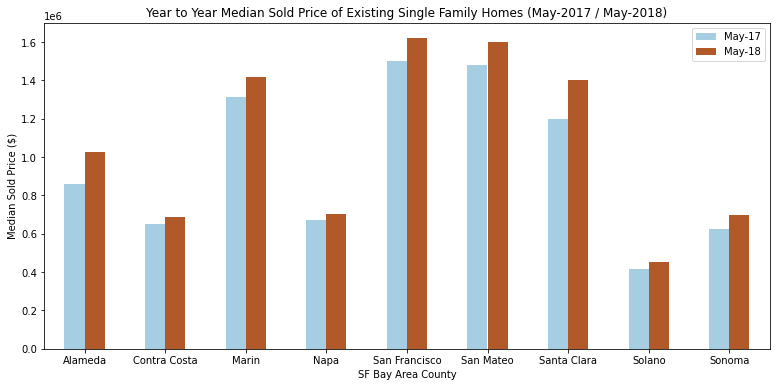

In [16]:
May17Price = dfSFBay.loc[:,['SF Bay County','May-17']]
May18Price = dfSFBay.loc[:,['SF Bay County','May-18']]
YTYPriceDiff = pd.merge(May17Price,May18Price, how='inner',on=['SF Bay County']).set_index('SF Bay County').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Median Sold Price of Existing Single Family Homes (May-2017 / May-2018)')
plt.ylabel('Median Sold Price ($)')
plt.xlabel('SF Bay Area County')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SF Bay Area County')

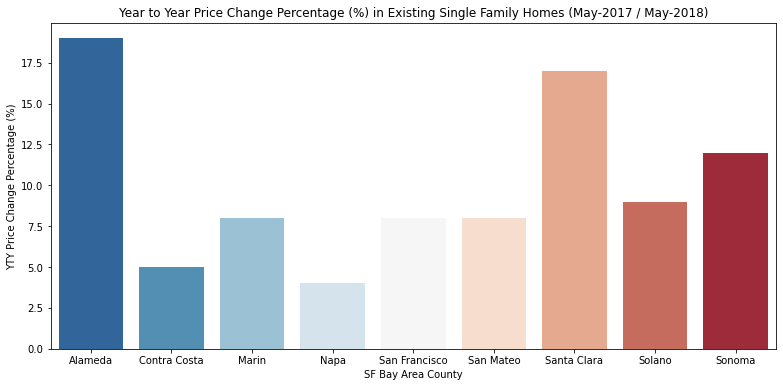

In [17]:
dfSFBay[['Price YTY % Chg']] = dfSFBay[['Price YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay County',y='Price YTY % Chg', data=dfSFBay,palette="RdBu_r")
plt.title('Year to Year Price Change Percentage (%) in Existing Single Family Homes (May-2017 / May-2018)')
plt.ylabel('YTY Price Change Percentage (%)')
plt.xlabel('SF Bay Area County')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Alameda'),
  Text(1, 0, 'Contra Costa'),
  Text(2, 0, 'Marin'),
  Text(3, 0, 'Napa'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'San Mateo'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Solano'),
  Text(8, 0, 'Sonoma')])

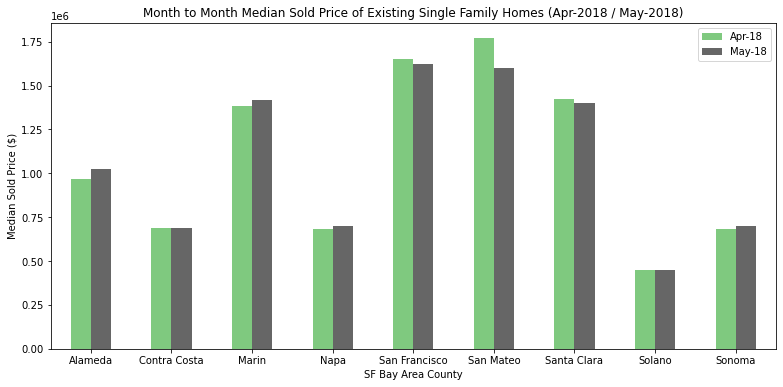

In [18]:
Apr18Price = dfSFBay.loc[:,['SF Bay County','Apr-18']]
May18Price = dfSFBay.loc[:,['SF Bay County','May-18']]
MTMPriceDiff = pd.merge(Apr18Price,May18Price, how='inner',on=['SF Bay County']).set_index('SF Bay County').plot.bar(figsize=(13,6),cmap='Accent')
plt.ylabel('Median Sold Price ($)')
plt.title('Month to Month Median Sold Price of Existing Single Family Homes (Apr-2018 / May-2018)')
plt.xlabel('SF Bay Area County')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SF Bay Area County')

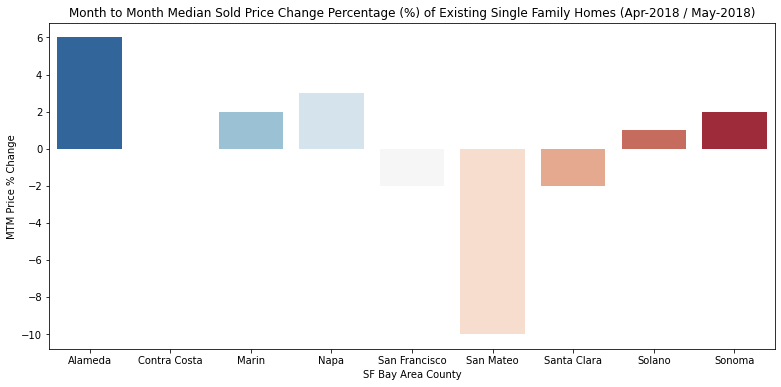

In [19]:
dfSFBay[['Price MTM % Chg']] = dfSFBay[['Price MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay County',y='Price MTM % Chg', data=dfSFBay,palette="RdBu_r")
plt.ylabel('MTM Price % Change')
plt.title('Month to Month Median Sold Price Change Percentage (%) of Existing Single Family Homes (Apr-2018 / May-2018)')
plt.xlabel('SF Bay Area County')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Alameda'),
  Text(1, 0, 'Contra Costa'),
  Text(2, 0, 'Marin'),
  Text(3, 0, 'Napa'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'San Mateo'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Solano'),
  Text(8, 0, 'Sonoma')])

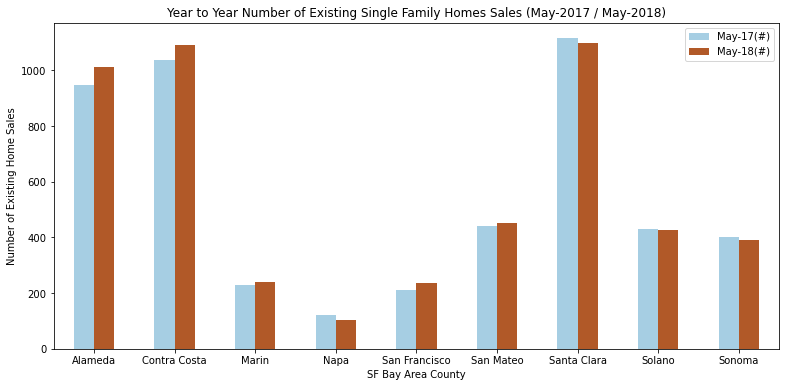

In [20]:
May17Sales = dfSFBay.loc[:,['SF Bay County','May-17(#)']]
May18Sales = dfSFBay.loc[:,['SF Bay County','May-18(#)']]
YTYSalesDiff = pd.merge(May17Sales,May18Sales, how='inner',on=['SF Bay County']).set_index('SF Bay County').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Number of Existing Single Family Homes Sales (May-2017 / May-2018)')
plt.ylabel('Number of Existing Home Sales')
plt.xlabel('SF Bay Area County')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SF Bay Area County')

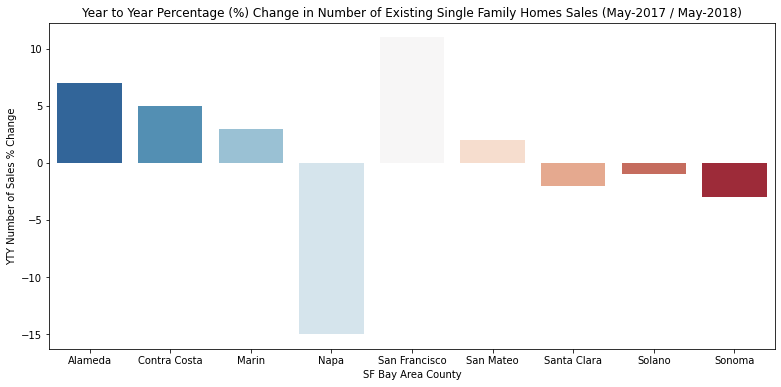

In [21]:
dfSFBay[['Sales YTY % Chg']] = dfSFBay[['Sales YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay County',y='Sales YTY % Chg', data=dfSFBay,palette="RdBu_r")
plt.title('Year to Year Percentage (%) Change in Number of Existing Single Family Homes Sales (May-2017 / May-2018)')
plt.ylabel('YTY Number of Sales % Change')
plt.xlabel('SF Bay Area County')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Alameda'),
  Text(1, 0, 'Contra Costa'),
  Text(2, 0, 'Marin'),
  Text(3, 0, 'Napa'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'San Mateo'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Solano'),
  Text(8, 0, 'Sonoma')])

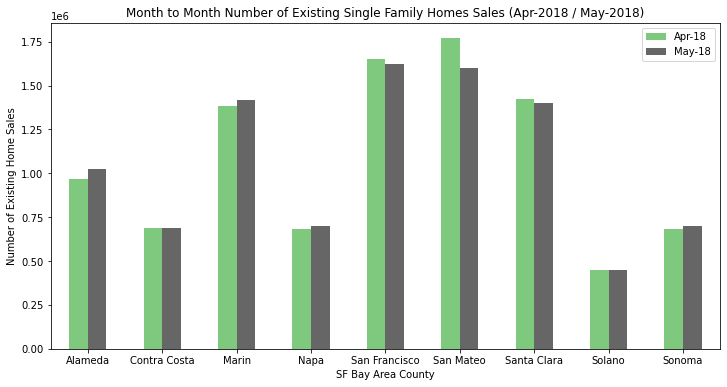

In [22]:
Apr18Sales = dfSFBay.loc[:,['SF Bay County','Apr-18(#)']]
May18Sales = dfSFBay.loc[:,['SF Bay County','May-18(#)']]
MTMSalesDiff = pd.merge(Apr18Price,May18Price, how='inner',on=['SF Bay County']).set_index('SF Bay County').plot.bar(figsize=(12,6),cmap='Accent')
plt.ylabel('Number of Existing Home Sales')
plt.title('Month to Month Number of Existing Single Family Homes Sales (Apr-2018 / May-2018)')
plt.xlabel('SF Bay Area County')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SF Bay Area County')

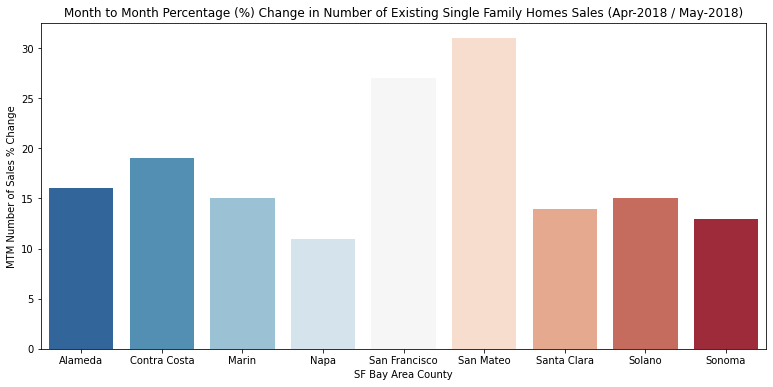

In [23]:
dfSFBay[['Sales MTM % Chg']] = dfSFBay[['Sales MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
MTMperc = sns.barplot(x='SF Bay County',y='Sales MTM % Chg', data=dfSFBay,palette="RdBu_r")
plt.title('Month to Month Percentage (%) Change in Number of Existing Single Family Homes Sales (Apr-2018 / May-2018)')
plt.ylabel('MTM Number of Sales % Change')
plt.xlabel('SF Bay Area County')

In [24]:
dfSoCal = df.iloc[21:27]
dfSoCal

,SALES AND PRICE ACTIVITY (SFH Homes),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
21,Southern California,2018-05-01 00:00:00,2018-04-03 00:00:00,NaN,2017-05-01 00:00:00,NaN,Price MTM% Chg,Price YTY% Chg,2018-05-01 00:00:00,2018-04-03 00:00:00,2017-05-01 00:00:00,Sales MTM% Chg,Sales YTY% Chg
22,Los Angeles,536940,528540,NaN,492040,NaN,0.0158928,0.0912527,3986.6,3388.97,4218.85,0.176345,-0.05505
23,Orange,838000,818000,NaN,795000,NaN,0.0244499,0.0540881,1725,1535,1862,0.123779,-0.0735768
24,Riverside,409925,400000,NaN,375000,NaN,0.0248125,0.0931333,2328,2185,2549,0.0654462,-0.0867007
25,San Bernardino,285000,289900,NaN,272500,NaN,-0.0169024,0.0458716,1373,1254,1345,0.0948963,0.0208178
26,San Diego,640000,635000,NaN,605000,NaN,0.00787402,0.0578512,2208,2003,2351,0.102346,-0.0608252


In [25]:
dfSoCal= dfSoCal.dropna(axis=1)
dfSoCal= dfSoCal.drop(dfSoCal.index[0])
dfSoCal.columns = 'SoCal Counties','May-18','Apr-18','May-17','Price MTM % Chg','Price YTY % Chg','May-18(#)','Apr-18(#)','May-17(#)','Sales MTM % Chg','Sales YTY % Chg' 
dfSoCal[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']] = dfSoCal[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']].applymap("{0:.2f}".format)
dfSoCal.index = np.arange(1, len(dfSoCal)+1)

In [26]:
dfSoCal['Price MTM % Chg'] = pd.to_numeric(dfSoCal['Price MTM % Chg'])
dfSoCal['Price YTY % Chg'] = pd.to_numeric(dfSoCal['Price YTY % Chg'])
dfSoCal['Sales MTM % Chg'] = pd.to_numeric(dfSoCal['Sales MTM % Chg'])
dfSoCal['Sales YTY % Chg'] = pd.to_numeric(dfSoCal['Sales YTY % Chg'])

dfSoCal.loc[:,'Price MTM % Chg'] = dfSoCal['Price MTM % Chg'] * 100
dfSoCal.loc[:,'Price YTY % Chg'] = dfSoCal['Price YTY % Chg'] * 100
dfSoCal.loc[:,'Sales MTM % Chg'] = dfSoCal['Sales MTM % Chg'] * 100
dfSoCal.loc[:,'Sales YTY % Chg'] = dfSoCal['Sales YTY % Chg'] * 100
dfSoCal

,SoCal Counties,May-18,Apr-18,May-17,Price MTM % Chg,Price YTY % Chg,May-18(#),Apr-18(#),May-17(#),Sales MTM % Chg,Sales YTY % Chg
1,Los Angeles,536940,528540,492040,2.0,9.0,3986.6,3388.97,4218.85,18.0,-6.0
2,Orange,838000,818000,795000,2.0,5.0,1725,1535,1862,12.0,-7.0
3,Riverside,409925,400000,375000,2.0,9.0,2328,2185,2549,7.0,-9.0
4,San Bernardino,285000,289900,272500,-2.0,5.0,1373,1254,1345,9.0,2.0
5,San Diego,640000,635000,605000,1.0,6.0,2208,2003,2351,10.0,-6.0


In [27]:
mediansoldprice = dfSoCal.loc[:,:'Price YTY % Chg']
mediansoldsales = dfSoCal.loc[:,'May-18(#)':'Sales YTY % Chg']
socalheader = {'Median Sold Price($) of Existing Single Family Homes':mediansoldprice, 'Number (#) of Existing Single Family Homes Sales':mediansoldsales}
socalcategory = pd.concat(socalheader.values(), axis=1, keys=socalheader.keys())
socalcategory

Median Sold Price($) of Existing Single Family Homes                  \
                                        SoCal Counties  May-18  Apr-18   
1                                        Los Angeles    536940  528540   
2                                            Orange     838000  818000   
3                                         Riverside     409925  400000   
4                                     San Bernardino    285000  289900   
5                                          San Diego    640000  635000   

                                           \
   May-17 Price MTM % Chg Price YTY % Chg   
1  492040             2.0             9.0   
2  795000             2.0             5.0   
3  375000             2.0             9.0   
4  272500            -2.0             5.0   
5  605000             1.0             6.0   

  Number (#) of Existing Single Family Homes Sales                      \
                                         May-18(#) Apr-18(#) May-17(#)   
1                                           3986.6   3388.97   4218.85   
2                                             1725      1535      1862   
3                                             2328      2185      2549   
4                                             1373      1254      1345   
5                                             2208      2003      2351   

                                   
  Sales MTM % Chg Sales YTY % Chg  
1            18.0            -6.0  
2            12.0            -7.0  
3             7.0            -9.0  
4             9.0             2.0  
5            10.0            -6.0

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Orange '),
  Text(2, 0, 'Riverside '),
  Text(3, 0, 'San Bernardino'),
  Text(4, 0, 'San Diego')])

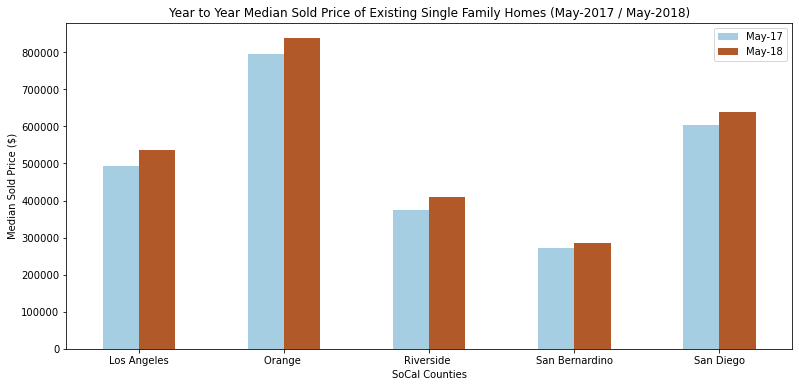

In [28]:
May17Price = dfSoCal.loc[:,['SoCal Counties','May-17']]
May18Price = dfSoCal.loc[:,['SoCal Counties','May-18']]
YTYPriceDiff = pd.merge(May17Price,May18Price, how='inner',on=['SoCal Counties']).set_index('SoCal Counties').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Median Sold Price of Existing Single Family Homes (May-2017 / May-2018)')
plt.ylabel('Median Sold Price ($)')
plt.xlabel('SoCal Counties')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SoCal Counties')

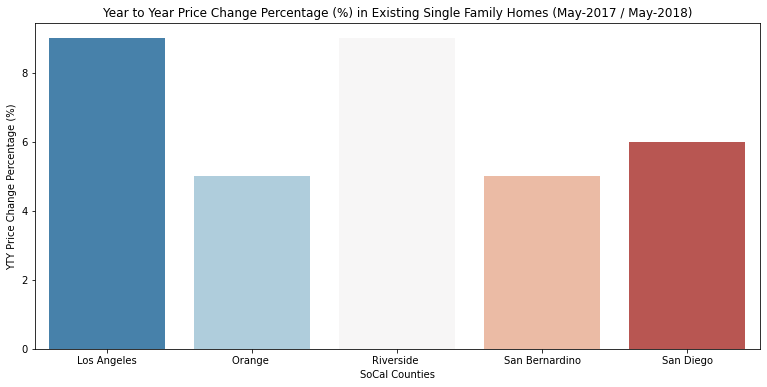

In [29]:
dfSoCal[['Price YTY % Chg']] = dfSoCal[['Price YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SoCal Counties',y='Price YTY % Chg', data=dfSoCal,palette="RdBu_r")
plt.title('Year to Year Price Change Percentage (%) in Existing Single Family Homes (May-2017 / May-2018)')
plt.ylabel('YTY Price Change Percentage (%)')
plt.xlabel('SoCal Counties')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Orange '),
  Text(2, 0, 'Riverside '),
  Text(3, 0, 'San Bernardino'),
  Text(4, 0, 'San Diego')])

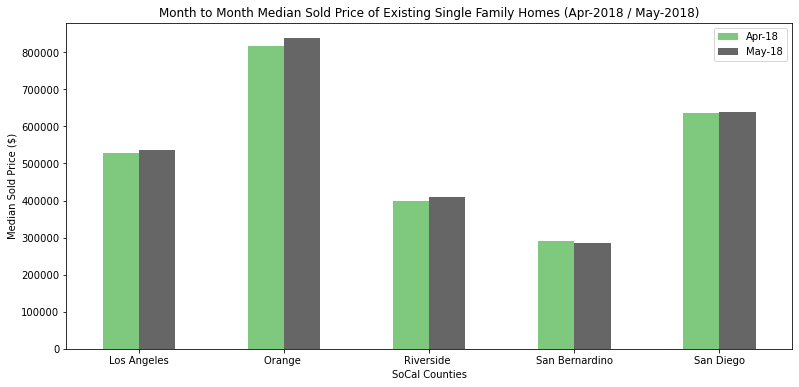

In [30]:
Apr18Price = dfSoCal.loc[:,['SoCal Counties','Apr-18']]
May18Price = dfSoCal.loc[:,['SoCal Counties','May-18']]
MTMPriceDiff = pd.merge(Apr18Price,May18Price, how='inner',on=['SoCal Counties']).set_index('SoCal Counties').plot.bar(figsize=(13,6),cmap='Accent')
plt.ylabel('Median Sold Price ($)')
plt.title('Month to Month Median Sold Price of Existing Single Family Homes (Apr-2018 / May-2018)')
plt.xlabel('SoCal Counties')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SoCal Counties')

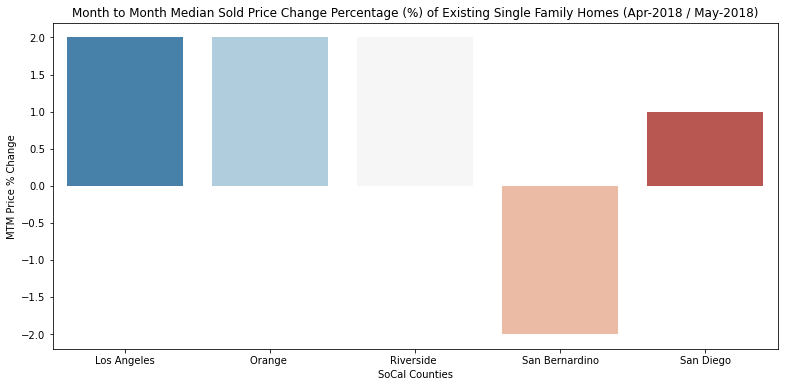

In [31]:
dfSoCal[['Price MTM % Chg']] = dfSoCal[['Price MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SoCal Counties',y='Price MTM % Chg', data=dfSoCal,palette="RdBu_r")
plt.ylabel('MTM Price % Change')
plt.title('Month to Month Median Sold Price Change Percentage (%) of Existing Single Family Homes (Apr-2018 / May-2018)')
plt.xlabel('SoCal Counties')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Orange '),
  Text(2, 0, 'Riverside '),
  Text(3, 0, 'San Bernardino'),
  Text(4, 0, 'San Diego')])

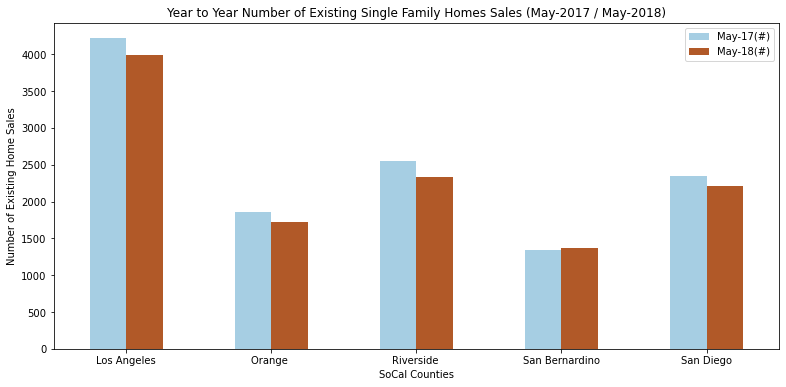

In [32]:
May17Sales = dfSoCal.loc[:,['SoCal Counties','May-17(#)']]
May18Sales = dfSoCal.loc[:,['SoCal Counties','May-18(#)']]
YTYSalesDiff = pd.merge(May17Sales,May18Sales, how='inner',on=['SoCal Counties']).set_index('SoCal Counties').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Number of Existing Single Family Homes Sales (May-2017 / May-2018)')
plt.ylabel('Number of Existing Home Sales')
plt.xlabel('SoCal Counties')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SoCal Counties')

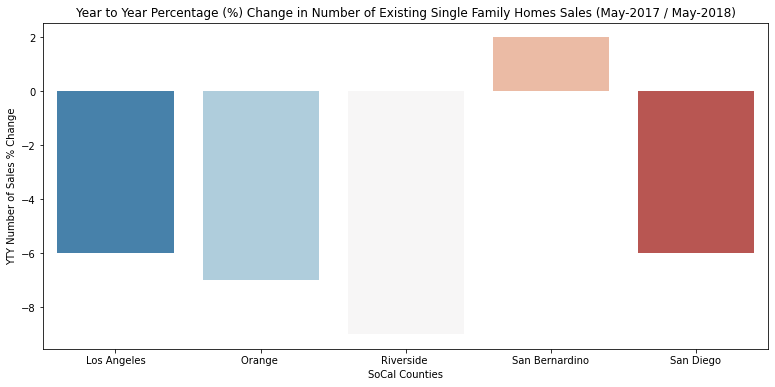

In [33]:
dfSoCal[['Sales YTY % Chg']] = dfSoCal[['Sales YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SoCal Counties',y='Sales YTY % Chg', data=dfSoCal,palette="RdBu_r")
plt.title('Year to Year Percentage (%) Change in Number of Existing Single Family Homes Sales (May-2017 / May-2018)')
plt.ylabel('YTY Number of Sales % Change')
plt.xlabel('SoCal Counties')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Orange '),
  Text(2, 0, 'Riverside '),
  Text(3, 0, 'San Bernardino'),
  Text(4, 0, 'San Diego')])

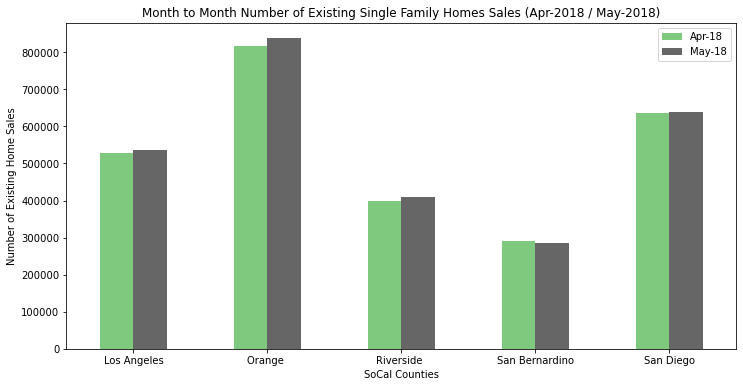

In [34]:
Apr18Sales = dfSoCal.loc[:,['SoCal Counties','Apr-18(#)']]
May18Sales = dfSoCal.loc[:,['SoCal Counties','May-18(#)']]
MTMSalesDiff = pd.merge(Apr18Price,May18Price, how='inner',on=['SoCal Counties']).set_index('SoCal Counties').plot.bar(figsize=(12,6),cmap='Accent')
plt.ylabel('Number of Existing Home Sales')
plt.title('Month to Month Number of Existing Single Family Homes Sales (Apr-2018 / May-2018)')
plt.xlabel('SoCal Counties')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'SoCal Counties')

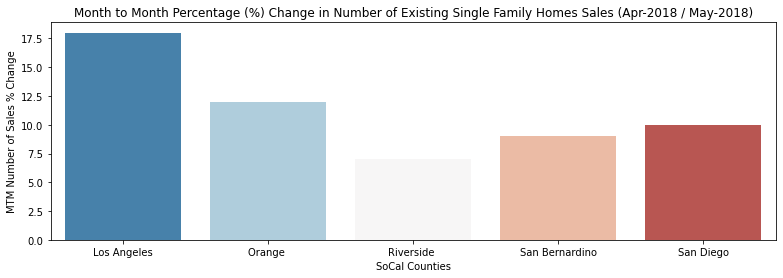

In [35]:
dfSoCal[['Sales MTM % Chg']] = dfSoCal[['Sales MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,4))
MTMperc = sns.barplot(x='SoCal Counties',y='Sales MTM % Chg', data=dfSoCal,palette="RdBu_r")
plt.title('Month to Month Percentage (%) Change in Number of Existing Single Family Homes Sales (Apr-2018 / May-2018)')
plt.ylabel('MTM Number of Sales % Change')
plt.xlabel('SoCal Counties')